<a href="https://colab.research.google.com/github/talibahnt/hello-world/blob/main/LAB4_Distributions_with_output_Timothy_3052021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 4. Probability distributions 

This lab illustrates the ways of analyzing probability distributions in Python, illustrated on examples of:
* people's hights, 
* weather data (outside temperature readings) and city sizes
* city sizes

If you may use a refresher on the basics of probabilities and statistics, including the concept of a random variable, probability distribution, mean and standard deviation you may find a stats bootcamp at: https://github.com/SSobol/ProbabilityStatsBootcamp/blob/master/Stats_Bootcamp_2018.ipynb

In [95]:
!pip install --upgrade geopandas
!pip install mapclassify --quiet
print('done')

Requirement already up-to-date: geopandas in /usr/local/lib/python3.7/dist-packages (0.9.0)
done


In [96]:
#include packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #for creating plots
from scipy import stats
import seaborn as sns #for styling the plots
#warnings.filterwarnings('ignore')
%matplotlib inline 

In [97]:
#include the distributions
from scipy.stats import norm #normal
from scipy.stats import genextreme as gev #generalized extreme value
from scipy.stats import pareto #pareto

## Example 1. People's hight distribution

Source: a sample of 10.000 people heigh-weight info from https://www.kaggle.com/mustafaali96/weight-height?select=weight-height.csv

The specific source and geography not disclosed, so we don't rely on this data being fully representative. So just using for illustration purposes. Although one can notice that the averages fit those reported for US. 

In [98]:
#upload the data
height = pd.read_csv('https://raw.githubusercontent.com/CUSP2020PUI/Data/master/weight-height.csv')

In [99]:
height.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [100]:
height.describe() #10.000 records

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [101]:
#introduce a custom function performing distribution analysis
def distribution_analysis(x, log_scale = False, fit_distribution = 'None', bins = 50, vis_means = True, vis_curve = True, print_outputs = True):
    #x - array of observations
    #log_scale - analyze distribution of log(x) if True
    #fit_distribution - fit the distribution ('normal', 'gev' or 'pareto') or do nothing if 'None'
    #bins - how many bins to use for binning the data
    #vis_means - show mean and std lines if True
    #vis_curve - show interpolated distribution curve over the histogram bars if True
    #print_outputs - print mean, std and percentiles
    
    if log_scale: 
        x1 = np.log10(x) #convert data to decimal logarithms
        xlabel = 'log(values)' #reflect in x labels
    else:
        x1 = x #leave original scale 
        xlabel = 'values'
    mu = x1.mean() #compute the mean
    if log_scale: #if logscale, output all three - log mean, its original scale and original scale mean
        print('Log mean = {:.2f}({:.2f}), mean = {:.2f}'.format(mu,10**mu,x.mean()))
    else:
        print('Mean = {:.2f}'.format(mu)) #otherwise print mean
    sigma = x1.std() #compute and output standard deviation 
    print('Standard deviation = {:.2f}'.format(sigma))
    for p in [1,5,25,50,75,95,99]: #output percentile values
        print('{:d} percentile = {:.2f}'.format(p,np.percentile(x,p)))
        
    #visualize histogram and the interpolated line (if vis_curve=True) using seaborn
    sns.distplot(x1, hist=True, kde=vis_curve, 
        bins=bins,color = 'darkblue', 
        hist_kws={'edgecolor':'black'},
        kde_kws={'linewidth': 4})
    
    #show vertical lines for mean and std if vis_means = True
    if vis_means:
        plt.axvline(mu, color='r', ls='--', lw=2.0)
        plt.axvline(mu-sigma, color='g', ls='--', lw=2.0)
        plt.axvline(mu+sigma, color='g', ls='--', lw=2.0)
        
    ylim = plt.gca().get_ylim() #keep the y-range of original distribution density values 
    #(to make sure the fitted distribution would not affect it)
    
    h = np.arange(mu - 3 * sigma, mu + 3 * sigma, sigma / 100) #3-sigma visualization range for the fitted distribution
    pars = None #fitted distribution parameters
    
    #fit and visualize the theoretic distribution
    if fit_distribution == 'normal':
        pars = norm.fit(x1)
        plt.plot(h,norm.pdf(h,*pars),'r')
    elif fit_distribution == 'gev':
        pars = gev.fit(x1)
        plt.plot(h,gev.pdf(h,*pars),'r')
    elif fit_distribution == 'pareto':
        pars = pareto.fit(x1)
        plt.plot(h,pareto.pdf(h,*pars),'r')
    
    plt.xlabel(xlabel) #add x label 
    plt.ylim(ylim) #restore the y-range of original distribution density values 
    plt.show()
    return pars

Mean = 66.37
Standard deviation = 3.85
1 percentile = 58.13
5 percentile = 60.25
25 percentile = 63.51
50 percentile = 66.32
75 percentile = 69.17
95 percentile = 72.62
99 percentile = 74.79


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


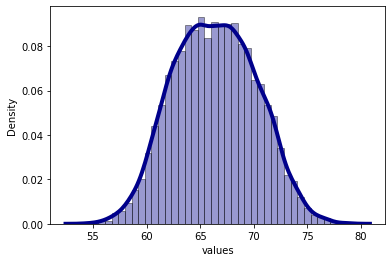

In [102]:
# output the empirical distribution for people's heights - histogram and interpolated curve
distribution_analysis(height.Height, bins=40, vis_means = False)

We can see the distribution somewhat similar to bell curve (normal), but having a wider (double) peak

Mean = 66.37
Standard deviation = 3.85
1 percentile = 58.13
5 percentile = 60.25
25 percentile = 63.51
50 percentile = 66.32
75 percentile = 69.17
95 percentile = 72.62
99 percentile = 74.79


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


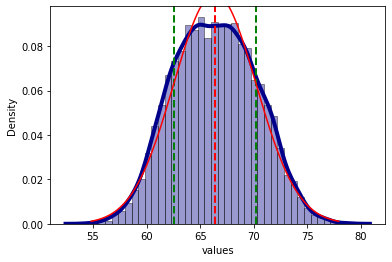

In [103]:
#indeed if we now fit the normal distribution the fit is not going to be perfect
distribution_analysis(height.Height, fit_distribution='normal', bins=40);

This is because the men and women heigh distribution are different and here are mixed together

In fact we have two modes in the distribution. Let's consider them separately

In [104]:
men_height = height[height.Gender=='Male'] #take only men
women_height = height[height.Gender=='Female'] #take only men
print (len(men_height), len(women_height)) #equal sizes of men/women samples

5000 5000


Mean = 69.03
Standard deviation = 2.86
1 percentile = 62.06
5 percentile = 64.33
25 percentile = 67.17
50 percentile = 69.03
75 percentile = 70.99
95 percentile = 73.70
99 percentile = 75.69


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


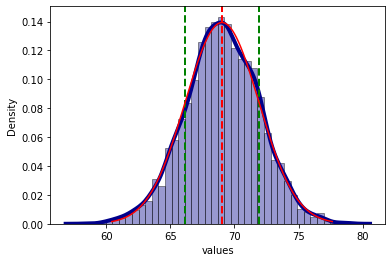

In [105]:
#if we now fit the normal distribution to men heights, it fits pretty well
distribution_analysis(men_height.Height, fit_distribution='normal',bins=40);

The average height is 69", while those taller than 75.7" are already among the 1% outliers 

Mean = 63.71
Standard deviation = 2.70
1 percentile = 57.31
5 percentile = 59.27
25 percentile = 61.89
50 percentile = 63.73
75 percentile = 65.56
95 percentile = 68.14
99 percentile = 69.89


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


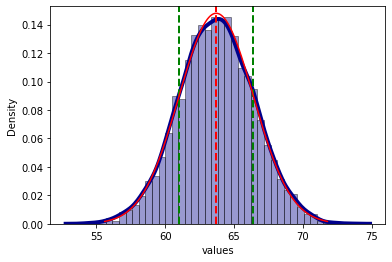

In [106]:
#same for women; just the parameters are different:
#the mean is 63.7" and the 1% outliers start around the same level as the men averages
distribution_analysis(women_height.Height, fit_distribution='normal',bins=40);

### Extrapolating insights with the theoretic distributions
Now illustrate the way fitting the theoretic distribution analysis can help generalize the insights beyond the considered sample. Take a much smaller sample of 100 random men heights - imagine this is all the data we've got

In [107]:
men_sample = men_height.sample(n=100, random_state=11)

Mean = 68.87
Standard deviation = 2.85
1 percentile = 61.92
5 percentile = 63.56
25 percentile = 67.44
50 percentile = 68.70
75 percentile = 70.73
95 percentile = 73.74
99 percentile = 74.10


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


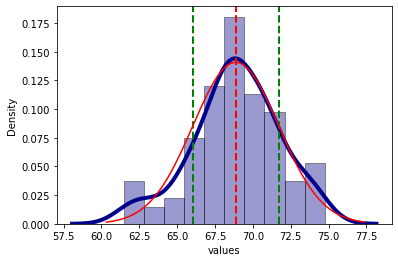

In [108]:
#the empiric distribution looks much more noisy, however the fitted normal distribution has similar parameters compared to the original one
pars = distribution_analysis(men_sample.Height, fit_distribution='normal',bins=10)

Use the fitted distribution to assess the chances for observing extreme hight values. Imagine we're designing a door and want to know the percentage of people if could comfortably accomodate.

In [109]:
#the function reporting pecentage of extreme values above a given `threshold` according to the empiric `data`
#as well as the theoretic distribution `dist` given its parameters `pars`
def extreme_percentage(threshold, data, dist, pars):
    if data is None:
        empiric = None
    else:
        empiric = 100.0 * sum(data >= threshold)/len(data) #compute empiric propobability
    if dist is None:
        theoretic = None
    else:
        theoretic = 100.0 * (1 - dist.cdf(threshold, *pars)) #asses theoretic probability using cumulative distribution function
    print('Percentage higher than {}: theory = {}, empiric = {}'.format(threshold, theoretic, empiric))

In [110]:
#percetage of people at least 6' tall
extreme_percentage(threshold = 72, data = men_sample.Height, dist = norm, pars = pars)

Percentage higher than 72: theory = 13.481970712238622, empiric = 12.0


We can see the theoretic and empuric estimates are similar, although of course not exactly the same

In [111]:
#percetage of people at least 6.5' tall
extreme_percentage(threshold = 78, data = men_sample.Height, dist = norm, pars = pars)

Percentage higher than 78: theory = 0.06394015857694724, empiric = 0.0


The theoretic estimate gives a somewhat low chance of 0.06%, while the sample of 100 people does not have heights above 6.5' at all, and this way fails to provide any reliable conclusion other than it should not be much higher than 1%. How appropriate is the theoretic estimate?

In [112]:
#compare it against the empirical estimate from a larger sample 

In [113]:
extreme_percentage(threshold = 78, data = men_height.Height, dist = norm, pars = pars)

Percentage higher than 78: theory = 0.06394015857694724, empiric = 0.1


So the theoretic distribution provided an estimate pretty close to the one observed from a larger sample without seeing this sample! So it helped drawing a meaningful inferece from a small sample which by itself could not provide the direct empiric estimate. This is what theoretic exprapolation is about and we see it works. Based on it, if we make the door 6.5' hight it will accomodate 99.94% of men entering and even more women as they are less tall on average.

In [114]:
#and it can work much further, where even the larger complete sample fails to provide any estimates
extreme_percentage(threshold = 84, data = men_height.Height, dist = norm, pars = pars)
#the theoretic chance of meeting a man at least 7' tall is 1 out of 20M. No surpise we don't see those in the sample of 5000.

Percentage higher than 84: theory = 4.7119495527603306e-06, empiric = 0.0


But not any theoretic inference can be reliable. E.g. if we fit a different kind of distribution - Pareto, the inferences change dramatically!

Mean = 68.87
Standard deviation = 2.85
1 percentile = 61.92
5 percentile = 63.56
25 percentile = 67.44
50 percentile = 68.70
75 percentile = 70.73
95 percentile = 73.74
99 percentile = 74.10


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


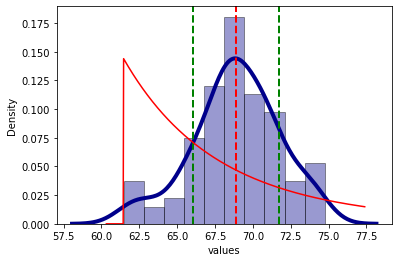

In [115]:
pareto_pars = distribution_analysis(men_sample.Height, fit_distribution='pareto', bins=10)

In [116]:
extreme_percentage(threshold = 84, data = men_height.Height, dist = pareto, pars = pareto_pars)

Percentage higher than 84: theory = 6.291687302412141, empiric = 0.0


It now gives more than a 6% chance (1 out of 16) for meeting an at least 7' tall man! Which is of course completely inconsistent with empirical observation...

But if we look at the plot above, we see that the distribution did not really fit the sample well. So obviously its inferences can't be trusted.

This assessment is visually obvious but it highlights the importance of assessing the quality of the model fit. We are going to provide some more robust quantitative criteria for it later in the class.

## Task 1. Weight analysis
Fit the normal distribution to the a) men and b) women weight observations (use complete sample). Report the parameters and visulize the fit. c) Provide a theoretic and empiric assessment of observing a man and women heavier than 200 lb, 250 lb and 300 lb.

Mean = 187.02
Standard deviation = 19.78
1 percentile = 140.04
5 percentile = 154.80
25 percentile = 173.89
50 percentile = 187.03
75 percentile = 200.36
95 percentile = 218.98
99 percentile = 232.25


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


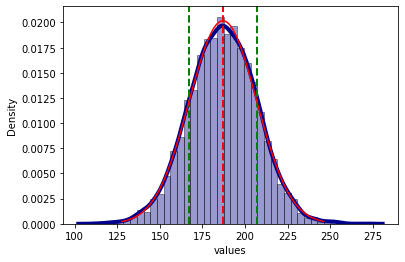

In [117]:
distribution_analysis(men_height.Weight, fit_distribution='normal',bins=40);

Mean = 135.86
Standard deviation = 19.02
1 percentile = 92.12
5 percentile = 103.96
25 percentile = 122.93
50 percentile = 136.12
75 percentile = 148.81
95 percentile = 166.78
99 percentile = 179.18


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


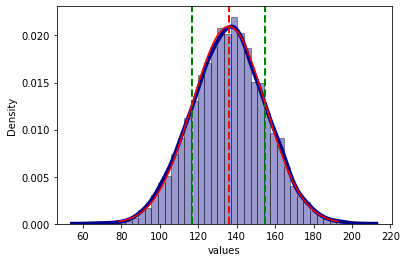

In [118]:
distribution_analysis(women_height.Weight, fit_distribution='normal',bins=40);

In [119]:
men_data_over_200 = height[(height['Weight'] >= 200) & (height['Gender']=='Male')] 


In [120]:
men_data_over_200.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
11,Male,71.640805,213.741169


In [121]:
len(men_data_over_200)

1279

Mean = 211.75
Standard deviation = 10.00
1 percentile = 200.21
5 percentile = 200.80
25 percentile = 204.24
50 percentile = 209.24
75 percentile = 216.90
95 percentile = 230.69
99 percentile = 246.49


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


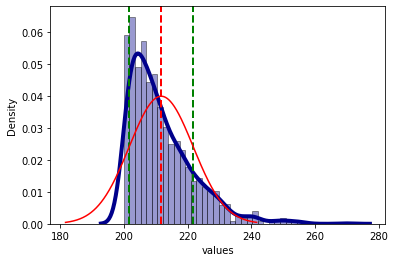

In [122]:
distribution_analysis(men_data_over_200.Weight, fit_distribution='normal',bins=40);

In [123]:
men_data_over_250 = height[(height['Weight'] >= 250) & (height['Gender']=='Male')]

In [124]:
men_data_over_250.head()

,Gender,Height,Weight
994,Male,78.095867,255.690835
1610,Male,76.617546,255.863326
2014,Male,78.998742,269.989699
2070,Male,77.465569,252.556689
2971,Male,75.156879,250.317151


In [125]:
len(men_data_over_250)

8

Mean = 255.49
Standard deviation = 6.17
1 percentile = 250.39
5 percentile = 250.70
25 percentile = 252.27
50 percentile = 254.05
75 percentile = 255.73
95 percentile = 265.05
99 percentile = 269.00


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


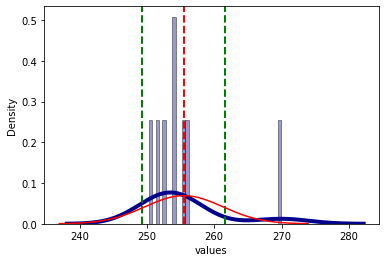

In [126]:
distribution_analysis(men_data_over_250.Weight, fit_distribution='normal',bins=40);

In [127]:
men_data_over_300 = height[(height['Weight'] >= 300) & (height['Gender']=='Male')]

In [128]:
men_data_over_300.head() #Why isn't it showing any data? Perhaps, I should do a len function to look at the number of records.

,Gender,Height,Weight


In [129]:
len(men_data_over_300) #There are zero records.

0

In [130]:
men_data_over_Weight=height[height['Weight'].isin([200,250,300])]

In [131]:
distribution_analysis(men_data_over_300.Weight, fit_distribution='normal',bins=40); #The index error is saying that it cannot create a graph when there are no records found for men that weigh over 300 lbs.

Mean = nan
Standard deviation = nan


IndexError: ignored

In [ ]:
women_data_over_200 = height[(height['Weight'] >= 200) & (height['Gender']=='Female')] #height is the name of the data. So weight is an attribute of the data height. >=200 creates a bound. And gender is an attribute of height.

In [ ]:
women_data_over_200.head() #This shows only one record for women that weigh over 200 lbs.

In [ ]:
len(women_data_over_200) #This confirms that there is only one record.

In [ ]:
distribution_analysis(women_data_over_200.Weight, fit_distribution='normal',bins=40); #The graph shows only one record for a women that weighs over 200 lbs.

In [ ]:
women_data_over_250 = height[(height ['Weight']>= 250) & (height['Gender']=='Female')]

In [ ]:
women_data_over_250.head() #This shows that there are zero records for women that weigh over 250 lbs.

In [ ]:
len(women_data_over_250) #This confirms that there are zero records for woment that weigh over 250 lbs.

In [ ]:
distribution_analysis(women_data_over_250.Weight, fit_distribution='normal',bins=40); #The index error basically says that we cannot run a graph with zero axes.

In [ ]:
women_data_over_300 = height[(height ['Weight']>=300) & (height['Gender']=='Female')]

In [ ]:
women_data_over_300.head()

In [ ]:
len(women_data_over_300)

In [ ]:
distribution_analysis(women_data_over_300.Weight, fit_distribution='normal',bins=40); #There are zero records of women that weigh over 300 lbs.

In [ ]:
extreme_percentage(threshold = 200, data = men_height.Weight, dist = pareto, pars = pareto_pars)

## Example 2. Weather data

Consider another example of weather data provided by https://www.noaa.gov

It was collected for several weather stations accross NYC and includes the daily observations of minimal, maximal, average daily temperatures, precipitation and snowfall amounts.

In [ ]:
NYCweather = pd.read_csv('https://raw.githubusercontent.com/CUSP2020PUI/Data/master/weather_daily.csv')

In [ ]:
NYCweather.head()

In [ ]:
NYCweather.describe()

As only lat-long seem to be numeric convert other fields of interst to the appropriate type

In [ ]:
for col in ['maxtemp','mintemp','avgtemp']:
    NYCweather[col] = pd.to_numeric(NYCweather[col],errors='coerce')

In [ ]:
NYCweather.date = pd.to_datetime(NYCweather.date)

In [ ]:
NYCweather.dropna(inplace = True) #drop records with nan's

In [ ]:
(NYCweather.date.min(),NYCweather.date.max()) #period of observation

In [ ]:
NYCweather[['latitude','longitude','date']].groupby(['latitude','longitude']).count() #see the observations per station

In [ ]:
NYCweather = NYCweather[NYCweather.latitude == 40.77] #take one of the two stations (in Long Island City) with max observation days 

In [ ]:
len(NYCweather)

Now look at the distribution of the average daily temperatures

In [ ]:
distribution_analysis(NYCweather.avgtemp, fit_distribution='normal',bins=12)

The distribution generally resembles the bell curve but does not look that consistent. Perhaps this is because we have seasons in NYC and summer temperatures are nothing alike winter temperatures?

Let's filter only summer and take the max temperatures for this period

In [ ]:
NYCweather['month'] = pd.DatetimeIndex(NYCweather['date']).month #get the month from the date

In [ ]:
NYCsummer=NYCweather[(NYCweather['month']>=6) & (NYCweather['month']<=8)] #filter the summer observations only

In [ ]:
distribution_analysis(NYCsummer.avgtemp, fit_distribution='normal',bins=12) #avg temp distribution

In [ ]:
summertemp_pars = distribution_analysis(NYCsummer.maxtemp, fit_distribution='normal',bins=12) #max temp distribution

What is the theoretic and emprical chance of encountering a max temp above 100 degrees? Above 105?

In [ ]:
extreme_percentage(threshold = 100, data = NYCsummer.maxtemp, dist = norm, pars = summertemp_pars)

In [ ]:
extreme_percentage(threshold = 105, data = NYCsummer.maxtemp, dist = norm, pars = summertemp_pars)

## Task 2. Analyze the distribution of winter min temperatures. 
Consider only the months of 12,1,2. Fit the normal distribution. Assess the chance of encountering a min temperature below 20, 10, 0F

Note: you'll need to modify the extreme_percentage function to return low percentages (create a new one extreme_low_percentage) 

Extracredit: can you think of the way of getting those extreme low percentages (theoretic or both - theoretic and empiric) using the old version of the function?

In [ ]:
NYCweather['month'] = pd.DatetimeIndex(NYCweather['date']).month 

In [ ]:
NYCwinter=NYCweather[NYCweather['month'].isin([12,1,2])] #Filter the winter observations only. Winter months 12-2.(Dec., Jan., Feb.)

In [ ]:
# NYCwinter=NYCweather[(NYCweather['month']>=12) | (NYCweather['month']<=2)] can use this code too. | means or. Otherwise if I used & it would return an empty dataframe because no month is greater than 12 and less than 2.

In [ ]:
distribution_analysis(NYCweather.mintemp, fit_distribution='normal',bins=12) #Found the 'mintemp' or the minium temperature for NYC weather across all seasons.

In [ ]:
distribution_analysis(NYCwinter.avgtemp, fit_distribution='normal',bins=12) #The 'avgtemp' (average temperature) for NYC winter.

In [ ]:
wintertemp_pars = distribution_analysis(NYCwinter.mintemp, fit_distribution='normal',bins=12)  #The'mintemp' (minimum temperature) for for NYC winter.

In [ ]:
extreme_percentage(threshold =20, data = NYCwinter.mintemp, dist = norm, pars = wintertemp_pars)

In [ ]:
extreme_percentage(threshold =10, data = NYCwinter.mintemp, dist = norm, pars = wintertemp_pars)

In [ ]:
extreme_percentage(threshold =0, data = NYCwinter.mintemp, dist = norm, pars = wintertemp_pars)

## Example 3. City sizes

Analyze the distribution of city sizes accross US and the world based on the data from https://simplemaps.com/data/world-cities

In [ ]:
UScities = pd.read_csv('https://raw.githubusercontent.com/CUSP2020PUI/Data/master/uscities.csv')

In [ ]:
UScities.head()

In [ ]:
UScities.describe() #we have cities with zero population

In [ ]:
UScities = UScities[UScities.population >= 100] #keep only those with at least 100 residents

In [ ]:
len(UScities) #there are 27k of US cities in the database

In [ ]:
distribution_analysis(UScities.population, vis_means = False) 
#clearly visualizing the distribution on the original scale does not make much sense
#this is because the scale ranges considerable (std so much higher than the mean)

In [ ]:
#let's repeat on the log-scale 
distribution_analysis(UScities.population, log_scale=True)

In [ ]:
#the distribution now makes more sense; but as its not centered around mean, the normal distribution won't fit well
distribution_analysis(UScities.population, log_scale=True, fit_distribution='normal')

In [ ]:
#lets try GEV instead
pars = distribution_analysis(UScities.population, log_scale=True, fit_distribution='gev')

It fits better but maybe not perfectly well

Let's also try a rank plot visualization

In [ ]:
#function visualizing the rank plot for the 'top_percentile' of the values 'x' on the `log_scale` by default
def rank_plot(x, log_scale = True, top_percentile = 100):
    v = np.sort(x)[::-1]
    r = np.arange(1.0,len(x)+0.1,1.0) / len(x)
    st = ''
    v = v[r<=top_percentile/100.0]; r = r[r<=top_percentile/100.0]
    if log_scale:
        r = np.log10(r)
        v = np.log10(v)
        st = 'log'
    plt.plot(r,v,'o:')
    plt.xlabel(st+'rank')
    plt.ylabel(st+'value')

In [ ]:
rank_plot(UScities.population) #we can see the log-log rank plot nearly linear in the beginning

In [ ]:
rank_plot(UScities.population, top_percentile = 25) #so now focus on the top 25% of the cities (those are the ones above 5000 residents)

The plot is nearly linear with the slope coefficient pretty close to -1. It corresponds to an almost perfect Zipf law $$Population \sim \frac{1}{rank}$$

In [ ]:
#introduce a function reporting cumulative population of the `top_percentile` cities
def pareto_percent(top_percentile, data):
    empiric = 100.0 * sum(data[data >= np.percentile(data, 100.0 - top_percentile)])/sum(data)
    print('Top {} percent observations contribute {} percent of the total'.format(top_percentile, empiric))

In [ ]:
pareto_percent(20,UScities.population) #to 20 percent of cities cover even more than 80% - >90% of the total population

In [ ]:
pareto_percent(7,UScities.population[UScities.population>=100]) #and it takes only 7% to cover 80% of the population

In [ ]:
pareto_percent(1,UScities.population[UScities.population>=100]) #top 1% covers more than 50% of the population

## Task 3. Repeat the analysis for the world cities

Upload the data and keep only the cities above 10000 in population. Output the `describe` statistics.

Fit the GEV distribution on the log scale. Visualize the rank plot for the top 25% of the cities (after filtering). Report the percentage of the total population covered by top 20% and top 5% of the cities

In [ ]:
## upload the dataset for major world cities
WorldCities = pd.read_csv('https://raw.githubusercontent.com/CUSP2020PUI/Data/master/worldcities.csv')

In [ ]:
WorldCities.head()

In [ ]:
WorldCities.describe()

In [ ]:
WorldCities= WorldCities[WorldCities.population >= 10000] #I want to isolate/keep the records of World Cities with at least 10000 residents.

In [ ]:
len(WorldCities) #The total number of records for World Cities with at least 10000 residents.

In [ ]:
pars = distribution_analysis(WorldCities.population, log_scale=True, fit_distribution='gev')#The 'gev' generalized extreme value centers the normal fit.

In [ ]:
rank_plot(WorldCities.population, top_percentile = 25) # The top 25% of the World Cities with at least 10000 residents.

In [ ]:
pareto_percent(20,WorldCities.population[WorldCities.population>=10000]) #20 percent of World Cities with at least 10000 residents cover even more than 80% - >90% of the total population.

In [ ]:
pareto_percent(5,WorldCities.population[WorldCities.population>=10000]) #5 percent of the World Cities with at least 10000 residents to cover more than 50% of the population.

## Task 4. Taxi trip duration analysis

Upload the 'yellowTaxi_cleaned.csv' file saved in the previous lab. Analyze the trip distance the the trip duration distributions. Try fitting normal distribution on the original and the log-scale.

Take only the trips which start and end on Manhattan (feel free to use the taxi zones shapefile https://data.cityofnewyork.us/api/geospatial/d3c5-ddgc?method=export&format=Shapefile for borough information, create a TZ to borhough dictionary, then map it for filtering). Repeat the distribution analysis for the trip distances.

In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os
import urllib
import sys
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
#download the file - notice an alternative way of doing so through 
#a command line unix command curl, retreaving the data with progress tracking
#takes up to 5min on fast internet connection
!curl https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2019-01.csv > yellow_trips_19.csv

In [ ]:
 # alternate way of downloading file thorugh urllib, the first argument is the link, 
# # second is the name you want to give to the file 
# urllib.request.urlretrieve ("https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2019-01.csv", "yellow_trips_19_1.csv")

In [ ]:
#upload the data; the file is big, so takes some time, under a minute
data = pd.read_csv('yellow_trips_19.csv', parse_dates=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])
data.head()

In [ ]:

data['trip_duration'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime'])
data['trip_duration'] = data['trip_duration'].dt.total_seconds()/60
data.head()

In [ ]:
validind = (data.trip_duration > 0) & (data.trip_distance > 0) & (data.fare_amount > 0) #index of valid trips

In [ ]:
#filter the data - positive duration, distance, fare amount
data = data[validind]

In [ ]:
data['speed'] = data['trip_distance']/(data['trip_duration']/60)

In [ ]:
#based on the above impose the data sanity index
sanityindex = (data.fare_amount >= 2.5) & (data.fare_amount <= 300) & \
    (data.trip_distance >= 0.3) & (data.trip_distance <= 100) & \
    (data.speed <= 80) & (data.speed >= 2) & \
    (data.trip_duration <= 100) & (data.trip_duration >= 1)

In [ ]:
data = data[sanityindex]
data.shape #still 7.5M trips survive

In [ ]:
#recompute the statistics
data[['trip_distance', 'trip_duration', 'fare_amount', 'speed']].describe()

In [ ]:
#introduce a custom function performing distribution analysis
def distribution_analysis(x, log_scale = False, fit_distribution = 'None', bins = 50, vis_means = True, vis_curve = True, print_outputs = True):
    #x - array of observations
    #log_scale - analyze distribution of log(x) if True
    #fit_distribution - fit the distribution ('normal', 'gev' or 'pareto') or do nothing if 'None'
    #bins - how many bins to use for binning the data
    #vis_means - show mean and std lines if True
    #vis_curve - show interpolated distribution curve over the histogram bars if True
    #print_outputs - print mean, std and percentiles
    
    if log_scale: 
        x1 = np.log10(x) #convert data to decimal logarithms
        xlabel = 'log(values)' #reflect in x labels
    else:
        x1 = x #leave original scale 
        xlabel = 'values'
    mu = x1.mean() #compute the mean
    if log_scale: #if logscale, output all three - log mean, its original scale and original scale mean
        print('Log mean = {:.2f}({:.2f}), mean = {:.2f}'.format(mu,10**mu,x.mean()))
    else:
        print('Mean = {:.2f}'.format(mu)) #otherwise print mean
    sigma = x1.std() #compute and output standard deviation 
    print('Standard deviation = {:.2f}'.format(sigma))
    for p in [1,5,25,50,75,95,99]: #output percentile values
        print('{:d} percentile = {:.2f}'.format(p,np.percentile(x,p)))
        
    #visualize histogram and the interpolated line (if vis_curve=True) using seaborn
    sns.distplot(x1, hist=True, kde=vis_curve, 
        bins=bins,color = 'darkblue', 
        hist_kws={'edgecolor':'black'},
        kde_kws={'linewidth': 4})
    
    #show vertical lines for mean and std if vis_means = True
    if vis_means:
        plt.axvline(mu, color='r', ls='--', lw=2.0)
        plt.axvline(mu-sigma, color='g', ls='--', lw=2.0)
        plt.axvline(mu+sigma, color='g', ls='--', lw=2.0)
        
    ylim = plt.gca().get_ylim() #keep the y-range of original distribution density values 
    #(to make sure the fitted distribution would not affect it)
    
    h = np.arange(mu - 3 * sigma, mu + 3 * sigma, sigma / 100) #3-sigma visualization range for the fitted distribution
    pars = None #fitted distribution parameters
    
    #fit and visualize the theoretic distribution
    if fit_distribution == 'normal':
        pars = norm.fit(x1)
        plt.plot(h,norm.pdf(h,*pars),'r')
    elif fit_distribution == 'gev':
        pars = gev.fit(x1)
        plt.plot(h,gev.pdf(h,*pars),'r')
    elif fit_distribution == 'pareto':
        pars = pareto.fit(x1)
        plt.plot(h,pareto.pdf(h,*pars),'r')
    
    plt.xlabel(xlabel) #add x label 
    plt.ylim(ylim) #restore the y-range of original distribution density values 
    plt.show()
    return pars

In [ ]:
def plot_loghist(x, bins): #introduce a function for plotting a log-scale histogram
  #it ensures log-scale binning and label on the original scale
    logbins = np.logspace(np.log10(x.min()),np.log10(x.max()),bins)
    plt.hist(x, bins=logbins)
    plt.xscale('log')

In [ ]:
plot_loghist(data.trip_distance, 100) #Oringial Trip Distance Graph.

In [ ]:
trip_distance = data.trip_distance

In [ ]:
pars = distribution_analysis(trip_distance, log_scale=True, fit_distribution='gev') #Trip Distance Log Scale with gev. 

In [ ]:
trip_duration = data.trip_duration

In [ ]:
plot_loghist(data.trip_duration, 100) #Oringial Trip Duration Graph.

In [ ]:
pars = distribution_analysis(trip_duration, log_scale=True, fit_distribution='gev') #Trip Duration Log Scale with gev. 

In [ ]:
#upload the shapefile; The 'location_i' column consists of all taxi zones within NYC + Newark airport
tz = gpd.read_file('https://data.cityofnewyork.us/api/geospatial/d3c5-ddgc?method=export&format=Shapefile') #Use https://data.cityofnewyork.us/api/geospatial/d3c5-ddgc?method=export&format=Shapefile 
tz.head()

In [ ]:
#get the number of trips by taxi zone of origin
tripsByZone = data.groupby(by='PULocationID', as_index=False).count()[['PULocationID', 'DOLocationID']]
tripsByZone.rename(columns={'DOLocationID':'N_trips'}, inplace=True)
tripsByZone.head()

In [ ]:
tz.columns

In [ ]:
tripsViz = tz.merge(data, left_on='location_i', right_on='PULocationID')
tripsViz.head()

In [ ]:
Manhattan_trips_PULocationID=tripsViz.loc[(tripsViz['borough']=='Manhattan') & (tripsViz['DOLocationID']==tripsViz['PULocationID'])]
Manhattan_trips_PULocationID.head()

In [ ]:
Manhattan_trips_PULocationID.trip_distance

In [ ]:
pars = distribution_analysis(tripsViz, log_scale=True, fit_distribution='gev')